## Environment Set-up

First, we need to set up our environment by importing the **pandas**, **numpy**, and **matplotlib** libraries.

Then, we need to use pandas' **read_csv** function to read in our datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# load in data 
movies = pd.read_csv('C:/ml-20m/movies.csv', sep = ',')
ratings = pd.read_csv('C:/ml-20m/ratings.csv', sep = ',', parse_dates = ['timestamp'])

inspect data

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# get all animated movies
animated = movies[movies['genres'].str.contains('Animation')]
animated.shape

(1027, 3)

In [6]:
animated = pd.merge(animated, ratings, on = 'movieId', how = 'inner')
animated.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,4.0,859063718
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,4.0,849082891
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0,990969772
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628


In [7]:
# get all animated CHILDREN's movies
animated_children = animated[animated['genres'].str.contains('Children')]
animated_children.shape

(922619, 6)

In [8]:
animated_children.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [9]:
# all animated NON-CHILDREN's movies
animated_adult = animated[~animated['genres'].str.contains('Children')]
animated_adult.shape

(217857, 6)

In [10]:
animated_adult.head()

,movieId,title,genres,userId,rating,timestamp
107829,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,298,1.0,992545537
107830,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,358,1.0,868840936
107831,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,609,4.0,1131798793
107832,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1581,5.0,875922590
107833,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1831,5.0,846421792


In [11]:
# count the # of movie ID's for each value of rating
# i.e. group the movie ID's by the rating value and then sum them up for each rating value
animated_adult[['movieId','rating']].groupby('movieId').count().head(5)

,rating
movieId,
392,275
610,7845
720,8171
741,7072
1151,368


In [12]:
animated_children['rating'].describe()

count    922619.000000
mean          3.604636
std           1.000843
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
animated_adult['rating'].describe()

count    217857.000000
mean          3.671945
std           1.029405
min           0.500000
25%           3.000000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

on average adults higher rated but smaller sample size and don't know if normally distributed yet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000098B5940>]], dtype=object)

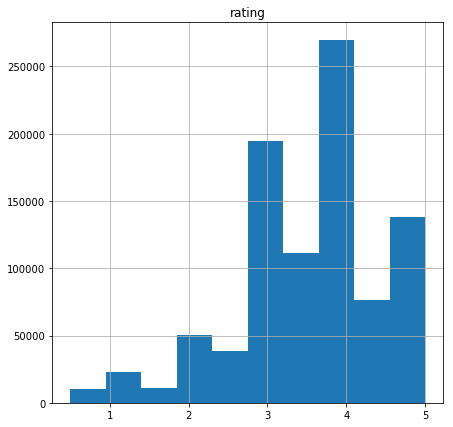

In [14]:
%matplotlib inline

# plot histogram of movie ratings in a 7x7 plot
animated_children.hist(column = 'rating', figsize = (7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009B4CE80>]], dtype=object)

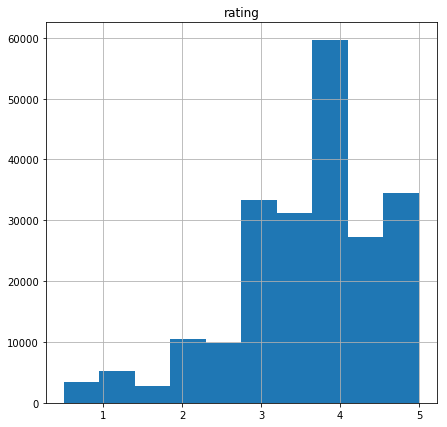

In [15]:
# plot histogram of movie ratings in a 7x7 plot

animated_adult.hist(column = 'rating', figsize = (7,7))

In [23]:
animated_children['rating_log'] = np.log10(animated_children['rating'])
animated_children.head(5)

C:\Users\NEWNSS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,movieId,title,genres,userId,rating,timestamp,rating_log
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407,0.602060
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452,0.698970
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871,0.602060
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887,0.602060
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821,0.653213


In [24]:
animated_adult['rating_log'] = np.log10(animated_adult['rating'])
animated_adult.head(5)

C:\Users\NEWNSS\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,movieId,title,genres,userId,rating,timestamp,rating_log
107829,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,298,1.0,992545537,0.00000
107830,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,358,1.0,868840936,0.00000
107831,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,609,4.0,1131798793,0.60206
107832,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1581,5.0,875922590,0.69897
107833,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation,1831,5.0,846421792,0.69897


both left skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A522CC0>]], dtype=object)

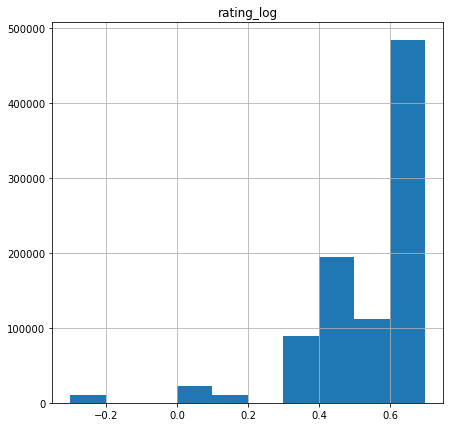

In [25]:
animated_children.hist(column = 'rating_log', figsize = (7,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AFAFBA8>]], dtype=object)

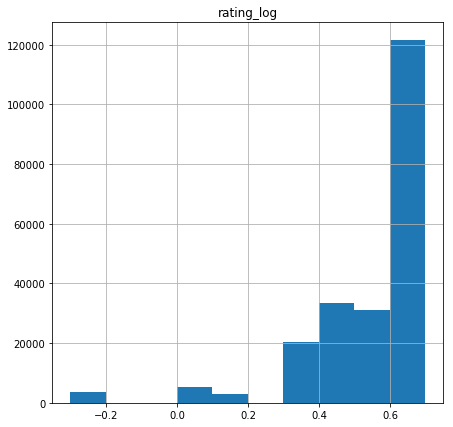

In [26]:
animated_adult.hist(column = 'rating_log', figsize = (7,7))

## Log didn't fix

However, it should be noted that in journals and other publications you will usually see the interquartile range reported as 45 to 71, rather than the calculated range.

In [27]:
def create_sampling_distribution(df,listArg):
    i = 0
    while (i < 200):
        x = np.array(df['rating'].sample(n=100)).mean()
        listArg.append(float(round(x,2)))
        i += 1
#children_means[:5]

In [28]:
children_means = []
adult_means = []

create_sampling_distribution(animated_children,children_means)
create_sampling_distribution(animated_adult,adult_means)

In [30]:
children_means[:5]

[3.46, 3.44, 3.68, 3.57, 3.72]

In [31]:
adult_means[:5]

[3.44, 3.74, 3.75, 3.52, 3.78]

(array([  2.,   5.,   8.,  23.,  28.,  57.,  43.,  22.,  10.,   2.]),
 array([ 3.26 ,  3.322,  3.384,  3.446,  3.508,  3.57 ,  3.632,  3.694,
         3.756,  3.818,  3.88 ]),
 <a list of 10 Patch objects>)

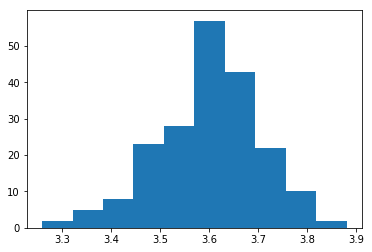

In [32]:
# plot histogram of movie ratings in a 7x7 plot
plt.hist(children_means)

(array([  2.,   5.,  11.,  22.,  36.,  39.,  55.,  21.,   8.,   1.]),
 array([ 3.36 ,  3.418,  3.476,  3.534,  3.592,  3.65 ,  3.708,  3.766,
         3.824,  3.882,  3.94 ]),
 <a list of 10 Patch objects>)

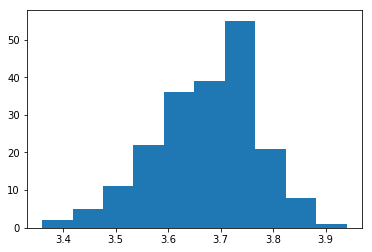

In [33]:
plt.hist(adult_means)

Samples are now relatively normal

In [34]:
# mu is from population = all animated movies
x_children = round(float(np.float64(children_means).mean()),3)
x_adult = round(float(np.float64(adult_means).mean()),3)

degFreedom = (len(children_means) + len(children_means)) - 2

s_children = round(float(np.float64(children_means).std()),3)
s_adult = round(float(np.float64(adult_means).std()),3)

stdErr = round(math.sqrt(s_children**2/len(children_means)) + (s_adult**2/len(adult_means)),4)

t = (x_children - x_adult)/stdErr

In [42]:
print("Mean of Sample of Animated Children's Movies:",x_children)
print("Standard Deviation of Sample of Animated Children's Movies:",s_children,'\n')

print("Mean of Sample of Animated Adult Movies:",x_adult)
print("Standard Deviation of Sample of Adult Children's Movies:",s_adult,'\n')

print("Degrees of Freedom:",degFreedom)

Mean of Sample of Animated Children's Movies: 3.6
Standard Deviation of Sample of Animated Children's Movies: 0.104 

Mean of Sample of Animated Adult Movies: 3.672
Standard Deviation of Sample of Adult Children's Movies: 0.099 

Degrees of Freedom: 398


In [39]:
print("t-test Value: ",round(t,2))

t-test Value:  -9.73


<img src="./t-table_values.PNG" align="center" style="width:650px;height:750px;"/>